In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
cd=pd.read_csv("Company_Data.csv")

In [3]:
cd.sample(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
199,6.42,122,88,5,335,126,Medium,64,14,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
10,9.01,121,78,9,150,100,Bad,26,10,No,Yes
27,5.27,98,118,0,19,107,Medium,64,17,Yes,No
85,8.47,125,103,0,304,112,Medium,49,13,No,No
216,5.73,141,33,0,243,144,Medium,34,17,Yes,No
366,5.98,124,56,11,447,134,Medium,53,12,No,Yes
29,7.81,104,99,15,226,102,Bad,58,17,Yes,Yes
125,9.34,89,78,0,181,49,Medium,43,15,No,No


In [4]:
cd.shape

(400, 11)

In [5]:
cd.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
label_encoder=preprocessing.LabelEncoder()
cd['ShelveLoc']=label_encoder.fit_transform(cd['ShelveLoc'])
cd['US']=label_encoder.fit_transform(cd['US'])
cd['Urban']=label_encoder.fit_transform(cd['Urban'])

In [8]:
cd.sample(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
194,7.23,112,98,18,481,128,2,45,11,1,1
305,8.03,115,29,26,394,132,2,33,13,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
143,0.53,122,88,7,36,159,0,28,17,1,1
80,8.01,113,100,16,353,79,0,68,11,1,1
212,12.04,145,69,19,501,105,2,45,11,1,1
346,8.97,132,107,0,144,125,2,33,13,0,0
326,4.69,133,30,0,152,122,2,53,17,1,0
295,4.21,118,35,14,502,137,2,79,10,0,1
111,6.62,132,118,12,272,151,2,43,14,1,1


In [9]:
x=cd.iloc[:,1:]
y=cd['Sales']
print(y.min())
print(y.max())

0.0
16.27


In [10]:
cd.insert(11,'Sales_cat','')

In [11]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,
396,6.14,139,23,3,37,120,2,55,11,0,1,
397,7.41,162,26,12,368,159,2,40,18,1,1,
398,5.94,100,79,7,284,95,0,50,12,1,1,


In [12]:
for i in range (0,len(cd['Sales'])):
    if cd['Sales'][i]>=0 and cd['Sales'][i]<=6:
        cd['Sales_cat'][i]='low'
    elif cd['Sales'][i]>6 and cd['Sales'][i]<=9:
        cd['Sales_cat'][i]='medium'
    elif cd['Sales'][i]>9:
        cd['Sales_cat'][i]='high'

C:\Users\Karthik\AppData\Local\Temp\ipykernel_15352\216700629.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['Sales_cat'][i]='high'
C:\Users\Karthik\AppData\Local\Temp\ipykernel_15352\216700629.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['Sales_cat'][i]='medium'
C:\Users\Karthik\AppData\Local\Temp\ipykernel_15352\216700629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['Sales_cat'][i]='low'


In [13]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,medium
4,4.15,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,medium
397,7.41,162,26,12,368,159,2,40,18,1,1,medium
398,5.94,100,79,7,284,95,0,50,12,1,1,low


In [14]:
cd.Sales_cat.value_counts()

medium    157
low       130
high      113
Name: Sales_cat, dtype: int64

# EDA

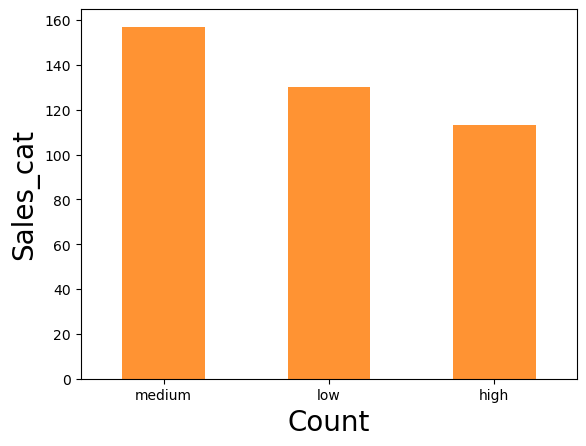

In [15]:
cd.Sales_cat.value_counts().plot(kind='bar',color="#FF9333")
plt.xlabel("Count",size=20)
plt.ylabel("Sales_cat",size=20)
plt.xticks(rotation="0")
plt.show()

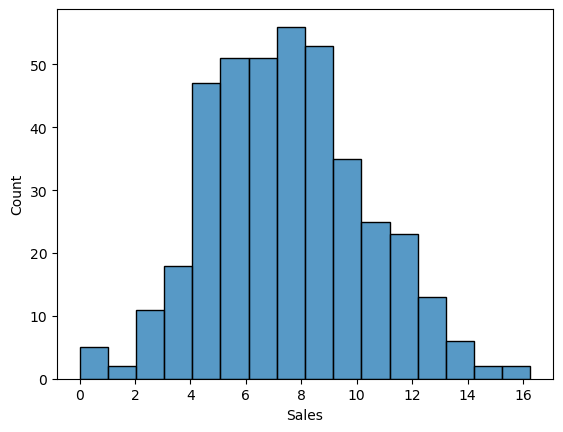

In [17]:
sns.histplot(x='Sales', data=cd, )
plt.show()

In [15]:
label_encoder=preprocessing.LabelEncoder()
cd['Sales_cat']=label_encoder.fit_transform(cd['Sales_cat'])

In [16]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,2
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,2
397,7.41,162,26,12,368,159,2,40,18,1,1,2
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [17]:
cd['Sales_cat'].unique()

array([0, 2, 1])

In [18]:
cd.Sales_cat.value_counts()

2    157
1    130
0    113
Name: Sales_cat, dtype: int64

In [19]:
x=cd.iloc[:,1:-1]
y=cd.iloc[:,-1]
y

0      0
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    0
Name: Sales_cat, Length: 400, dtype: int32

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [21]:
y_train

276    2
251    1
29     2
109    2
244    2
      ..
299    0
22     1
72     1
15     2
168    2
Name: Sales_cat, Length: 300, dtype: int32

# buliding decision tree classifier using gini criteria

In [22]:
model=DecisionTreeClassifier(criterion='gini',min_samples_split=5,max_depth=10)

In [23]:
model.fit(x_train,y_train)
pred=model.predict(x_train)
pd.Series(pred).value_counts()

2    124
1     94
0     82
dtype: int64

In [24]:
from sklearn import metrics
metrics.accuracy_score(pred,y_train)

0.9466666666666667

In [27]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
pd.Series(pred).value_counts()

2    37
0    35
1    28
dtype: int64

In [28]:
from sklearn import metrics
metrics.accuracy_score(pred,y_test)

0.65

# building decision tree classifier(cart)using entropy criteria

In [29]:
model=DecisionTreeClassifier(criterion='entropy',min_samples_split=5)

In [30]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
metrics.accuracy_score(pred,y_test)

0.59

In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.62      0.67      0.65        30
           1       0.69      0.67      0.68        33
           2       0.47      0.46      0.47        37

    accuracy                           0.59       100
   macro avg       0.59      0.60      0.60       100
weighted avg       0.59      0.59      0.59       100



In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [34]:
num_trees=100
model=BaggingClassifier(max_samples=0.8, n_estimators=num_trees,random_state=8)

model.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        33
           1       0.81      0.71      0.75        41
           2       0.58      0.63      0.60        46

    accuracy                           0.68       120
   macro avg       0.69      0.68      0.68       120
weighted avg       0.68      0.68      0.68       120



In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

num_trees = 140
max_features = 6

model = RandomForestClassifier(n_estimators=num_trees,max_samples=0.8, max_features=max_features, random_state = 8)

model.fit(x_train,y_train)

pred = model.predict(x_test)

print(classification_report(y_test,pred))

results = cross_val_score(model, x_train, y_train, cv=10)
print(results)
print(results.mean())

              precision    recall  f1-score   support

           0       0.67      0.64      0.65        25
           1       0.77      0.77      0.77        30
           2       0.70      0.71      0.70        45

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100

[0.6        0.56666667 0.7        0.76666667 0.73333333 0.6
 0.73333333 0.7        0.63333333 0.33333333]
0.6366666666666666
